# Name: Ahmed Mohiuddin Shah
# CMS ID: 415216
# Section: BSCS-12-A
# Assignment: 3
# Subject: Machine Learning
# Submitted to: Dr. Muhammad Moazam Fraz

# Library Imports

In [ ]:
import os
import gzip
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from node2vec import Node2Vec

ImportError: cannot import name 'triu' from 'scipy.linalg' (c:\Users\Ahmed Mohiuddin Shah\AppData\Local\pypoetry\Cache\virtualenvs\machine_learning_labs-LThbZT-V-py3.10\lib\site-packages\scipy\linalg\__init__.py)

# Dataset Exploration and Graph Construction

In [13]:
def load_graph(graph_file, plot_graph=True):
    G = nx.read_edgelist(graph_file, nodetype=int, create_using=nx.Graph())

    if plot_graph:
        # using spring layout
        plt.figure(figsize=(10, 10))
        pos = nx.spring_layout(G)

        node_color = [20000.0 * G.degree(v) for v in G]

        nx.draw_networkx(
            G,
            pos,
            with_labels=False,
            node_color=node_color,
            node_size=200,
            cmap=plt.cm.rainbow,
        )
        plt.show()

    return G

## Loading the Dataset

#### Unzipping the Dataset

In [14]:
# unzipping the file
with gzip.open('facebook_combined.txt.gz', 'rb') as f_in:
    with open('facebook_combined.txt', 'wb') as f_out:
        f_out.write(f_in.read())

### Loading the Edge List

Loading graph from dataset/0.edges


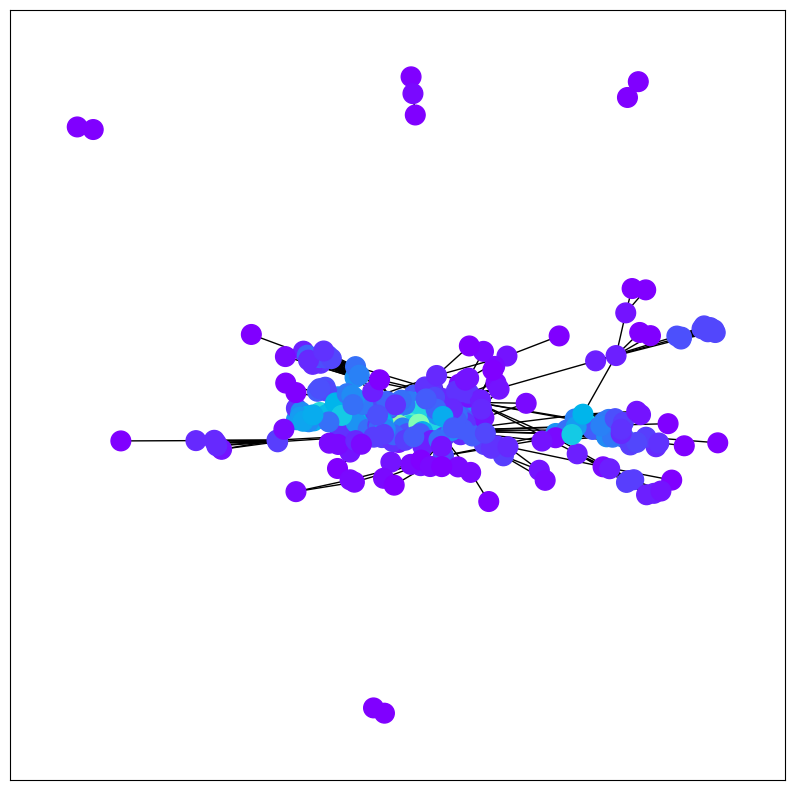

Loading graph from dataset/107.edges


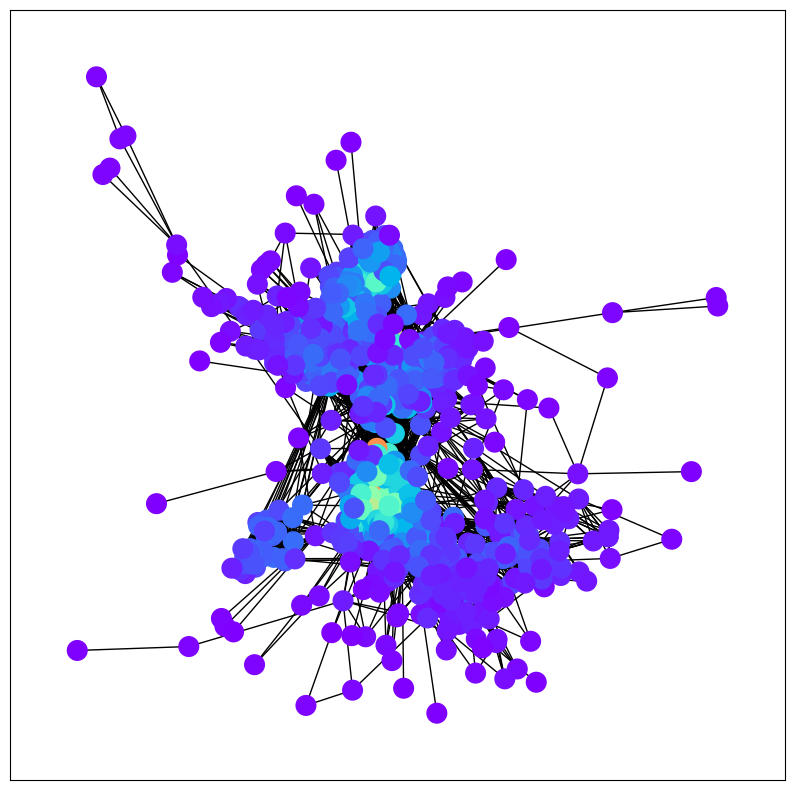

Loading graph from dataset/348.edges


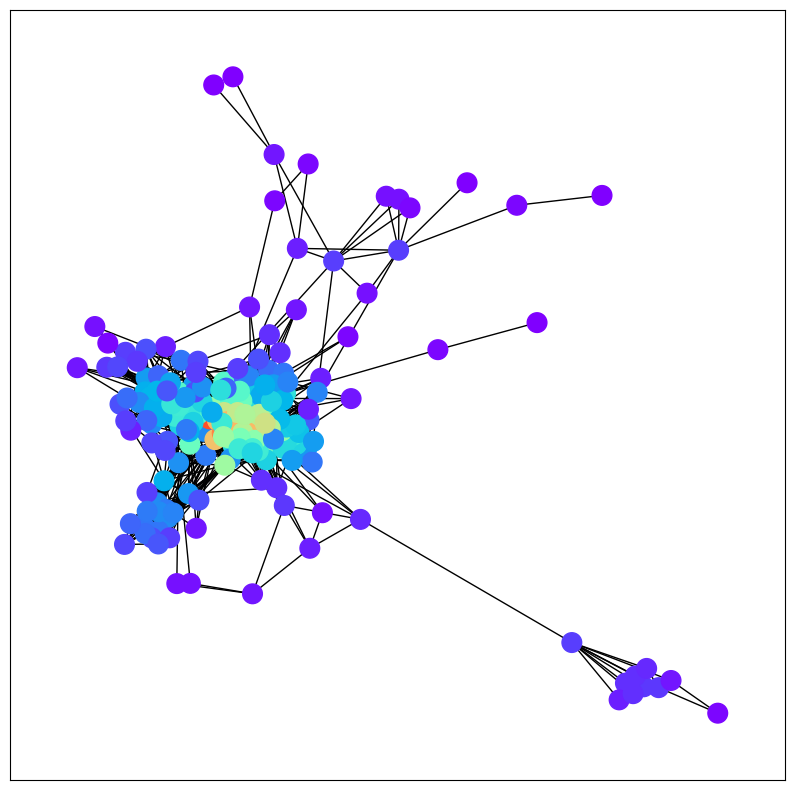

Loading graph from dataset/414.edges


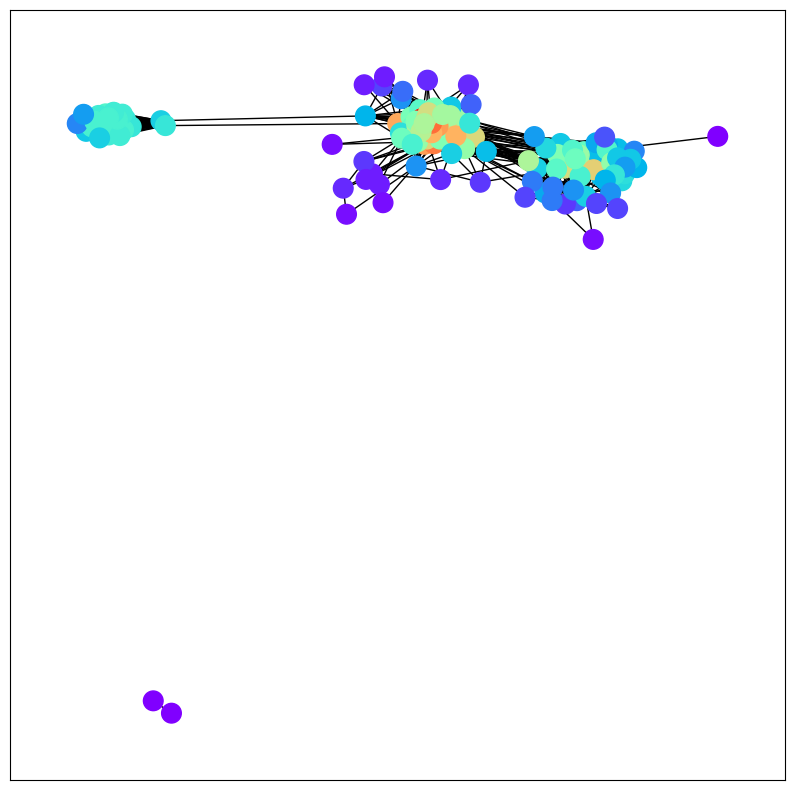

Loading graph from dataset/686.edges


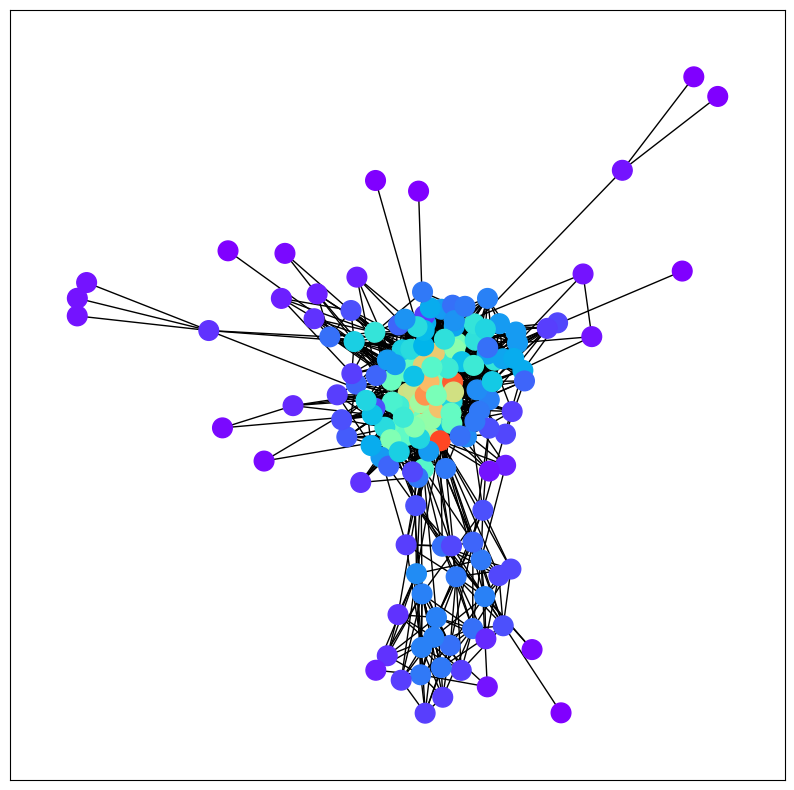

Loading graph from dataset/698.edges


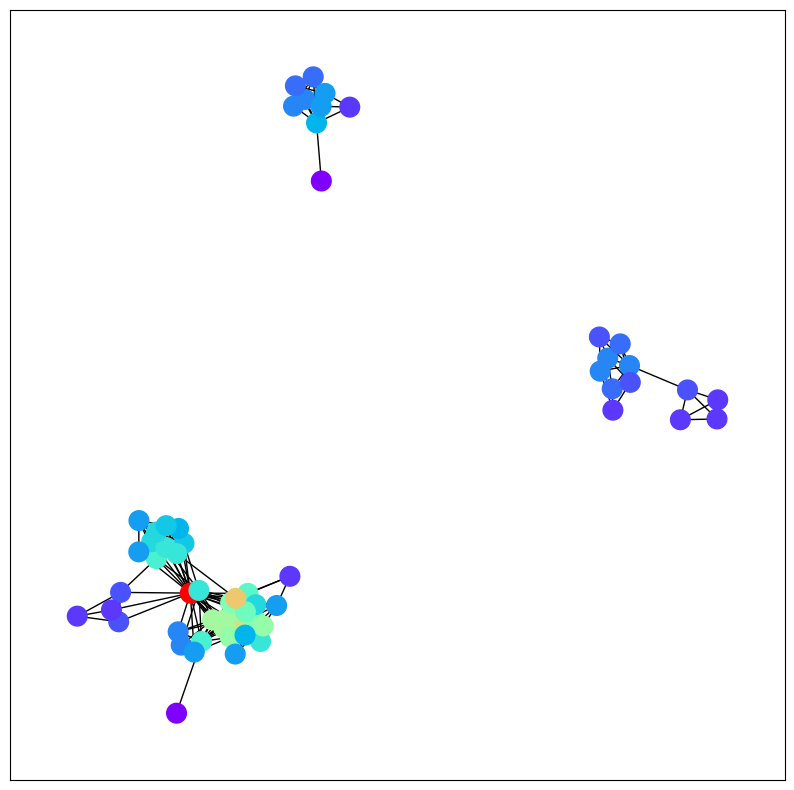

Loading graph from dataset/1684.edges


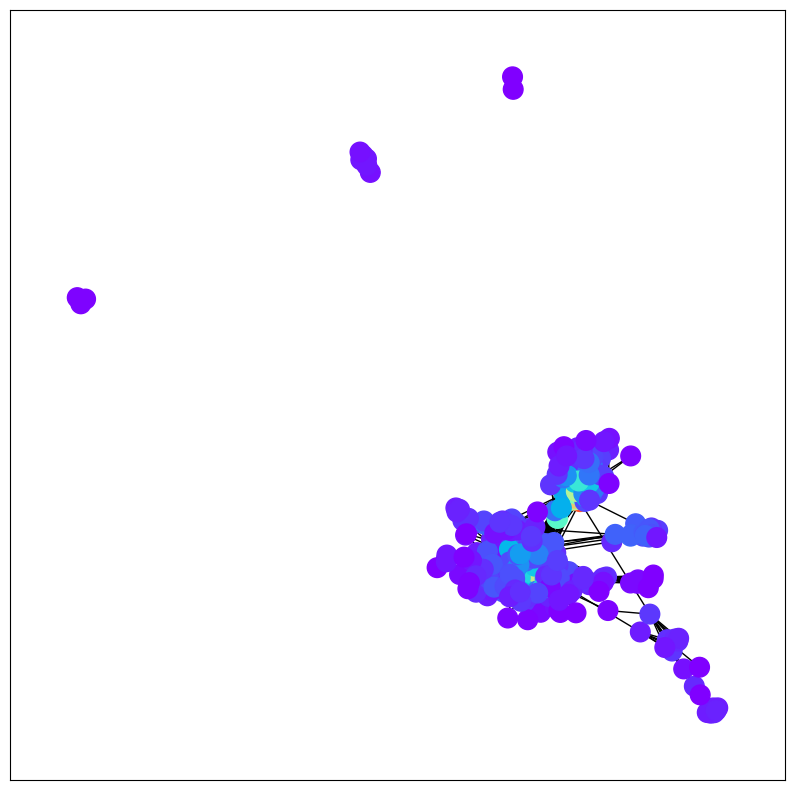

Loading graph from dataset/1912.edges


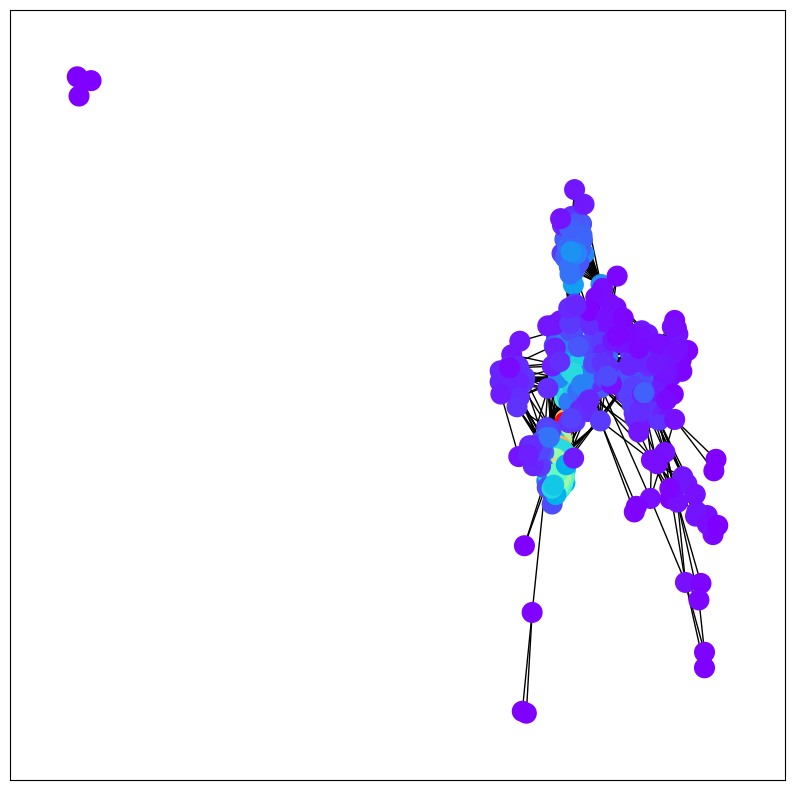

Loading graph from dataset/3437.edges


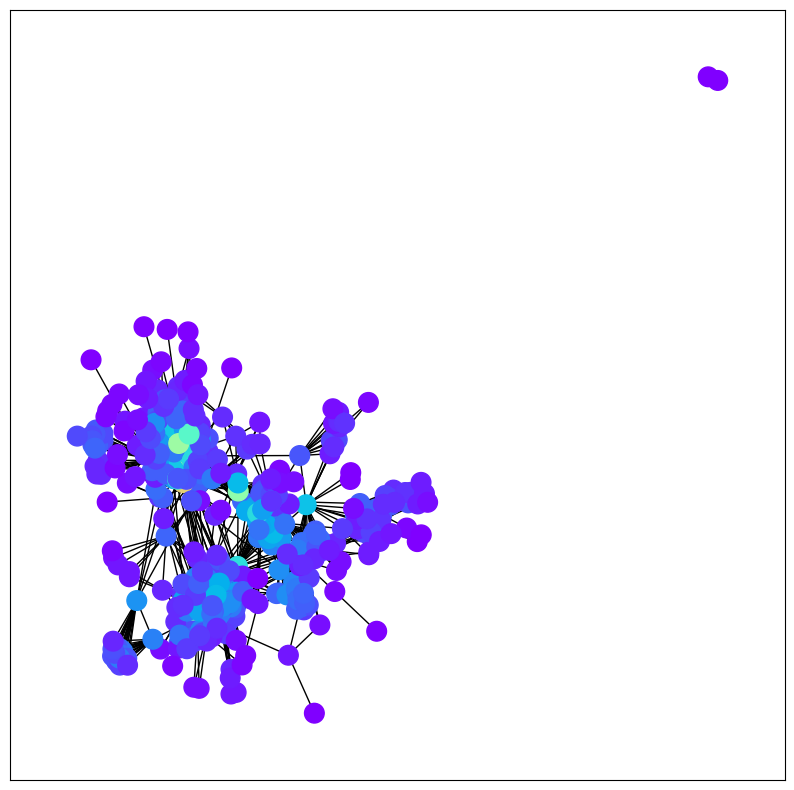

Loading graph from dataset/3980.edges


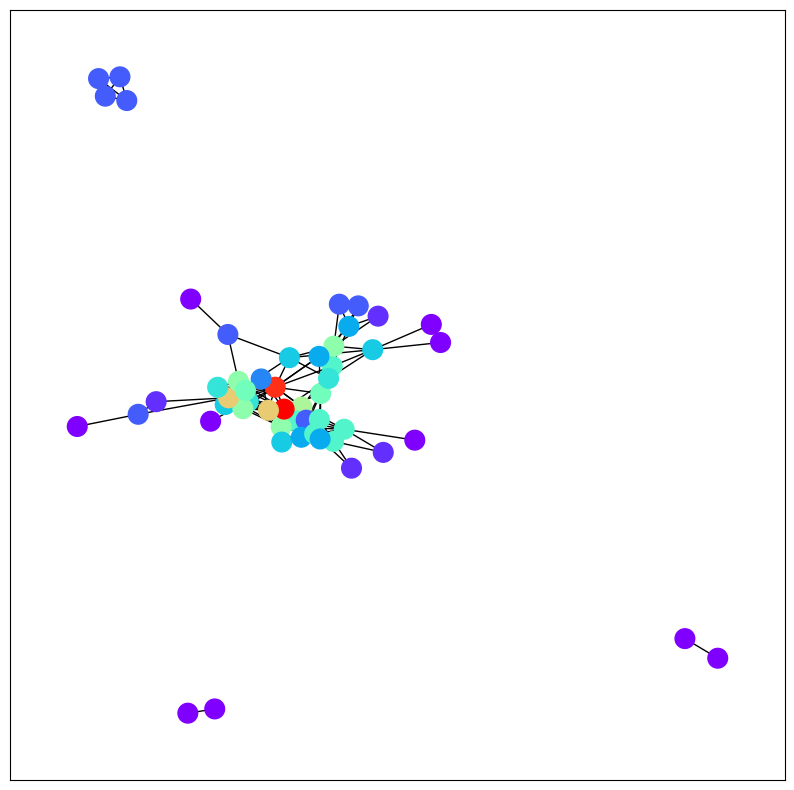

Loading graph from facebook_combined.txt


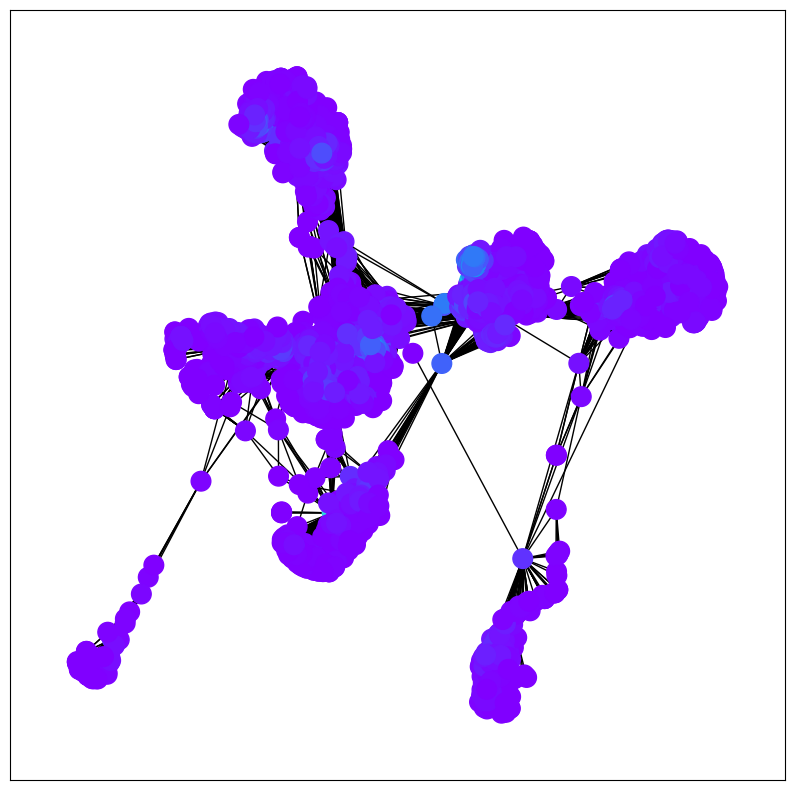

In [15]:
dataset_paths = [
    "dataset/0.edges",
    "dataset/107.edges",
    "dataset/348.edges",
    "dataset/414.edges",
    "dataset/686.edges",
    "dataset/698.edges",
    "dataset/1684.edges",
    "dataset/1912.edges",
    "dataset/3437.edges",
    "dataset/3980.edges",
    "facebook_combined.txt",
]

for dataset_path in dataset_paths:
    print(f"Loading graph from {dataset_path}")
    G = load_graph(dataset_path, plot_graph=True)
    

# Constructing similarity graph

In [25]:
def construct_similarity_graph(G, similarity_matrix, threshold=0.5, plot_graph=True):
    G_sim = nx.Graph()
    for i, src in enumerate(G.nodes()):
        for j, dst in enumerate(G.nodes()):
            if i != j and similarity_matrix[i, j] > threshold:
                G_sim.add_edge(src, dst, weight=similarity_matrix[i, j])

    if plot_graph:
        plt.figure(figsize=(10, 10))
        pos = nx.spring_layout(G_sim)

        node_color = [20000.0 * G_sim.degree(v) for v in G_sim]

        nx.draw_networkx(
            G_sim,
            pos,
            with_labels=False,
            node_color=node_color,
            node_size=200,
            cmap=plt.cm.rainbow,
        )
        plt.show()
    return G_sim

def construct_similarity_matrix(G, embeddings):
    similarity_matrix = np.zeros((len(G.nodes()), len(G.nodes())))
    for i, src in enumerate(G.nodes()):
        for j, dst in enumerate(G.nodes()):
            if i != j:
                similarity_matrix[i, j] = np.dot(embeddings[src], embeddings[dst])

    return similarity_matrix

## Similarity Matrices

In [ ]:
for dataset_path in dataset_paths:
    print(f"Loading graph from {dataset_path}")
    G = load_graph(dataset_path, plot_graph=False)

    print("Computing node2vec embeddings")
    node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
    model = node2vec.fit(window=10, min_count=1, batch_words=4)

    embeddings = {node: model.wv[node] for node in G.nodes()}
    similarity_matrix = construct_similarity_matrix(G, embeddings)

    print("Constructing similarity graph")
    G_sim = construct_similarity_graph(G, similarity_matrix, threshold=0.5, plot_graph=True)

    print("Done")

## Similarity Graphs

Loading graph from dataset/0.edges


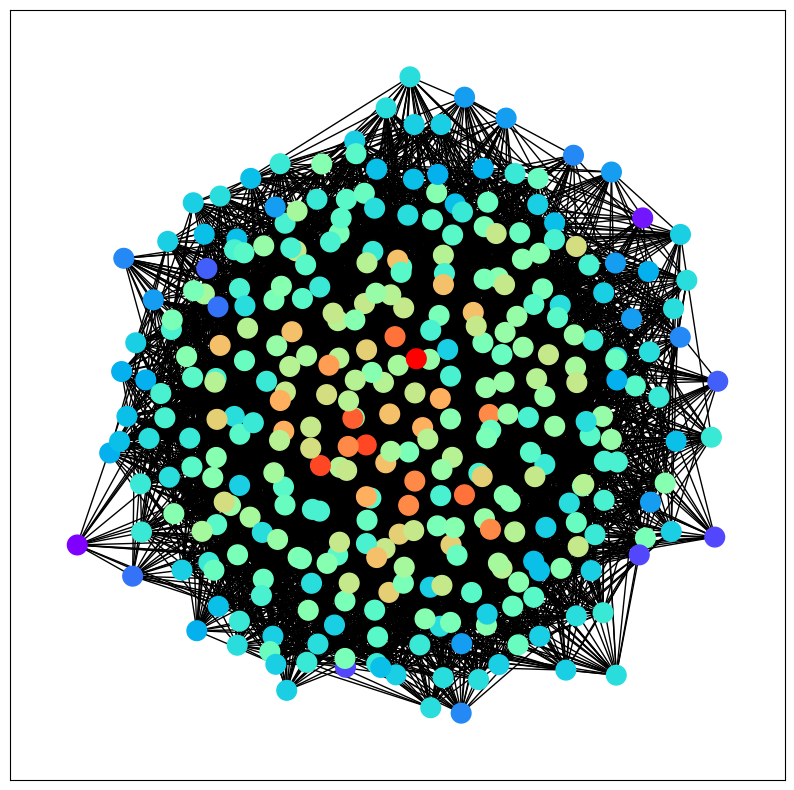

In [24]:
for dataset_path in dataset_paths:
    print(f"Loading graph from {dataset_path}")
    G = load_graph(dataset_path, plot_graph=False)
    similarity_matrix = np.random.rand(len(G.nodes()), len(G.nodes()))
    G_sim = construct_similarity_graph(G, similarity_matrix, threshold=0.95, plot_graph=True)
    break